# msigDB Canonical Pathway Analysis Proteomics and RNA-Seq Genes

   To Idenitify the canonical pathways of the top genes, gene set enrichment analysis of the canonical pathway was performed using the web application from the [*Broad Institute's Molecular Signature Database (MSigDB)*](http://software.broadinstitute.org/gsea/login.jsp;jsessionid=D4E7C89F9FAD3D013DA7360584637226) website. The data that were used are the RNA-seq differentially expressed genes data sets listed [here](https://github.com/hariesramdhani/winter-internship-2017/blob/master/data/parkinsonDE.txt) and the Proteomics data sets. This analysis was done in seven steps; analysis of the first top 20 proteomics genes, then 50, 100, 350, 600, 850 and finally all of the genes with **p-value < 0.05** (total of 1095 genes) for the RNA-seq data and only four steps were done for the Proteomics data.

The results of these analyses then are processed using Python `pandas`, `seaborn` and `matplotlib` library for the visualization of the heatmap. `math` library was used to calculate some mathematical operation, `re` for the works requiring regular expression and `os` for the `listdir()` function. Usinf GSEA from the Broad Institute's site canonical pathway analysis was done.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import os
import re

os.chdir('data/msigDB')

In [2]:
# Create dictionary for molecular function (MF), biological process (bp) and cellular component(cc) data
protCPDict = {}
rnaCPDict = {}

# Initialize variables with the most appearance in the code
pValue = 'pValue'
geneSet = 'GeneSet'

# Read data from the files and classify them into MF, BP and CC each
for filename in os.listdir():
    if filename.startswith('p'):
        keyName = re.findall(r'pTop(\S*).txt', filename)[0]
        protCPDict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('r'):
        keyName = re.findall(r'rTop(\S*).txt', filename)[0]
        rnaCPDict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]

protColNames = list(protCPDict.keys())
rnaColNames = list(rnaCPDict.keys())

In [3]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
protCPs = protColNames
protCPDF = protCPDict[protCPs[0]]
for protCP in protCPs[1:]:
    protCPDF = protCPDF.merge(protCPDict[protCP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
protCPDF['# NaN'] = protCPDF.isnull().sum(axis=1)
protCPDF = protCPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protCPDF['GeneSet']]
protCPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in protColNames:
    protCPDF[colName] = [-(math.log(pvals, 10)) for pvals in protCPDF[colName]]

protCPDF = protCPDF[['GeneSet', '25', '50', '100', 'All']]
protCPDF

,GeneSet,25,50,100,All
0,kegg alzheimers disease,5.677781,5.931814,12.892790,31.130182
1,reactome neuronal system,6.416801,4.869666,5.554396,9.634512
2,pid pdgfrb pathway,6.145087,4.910095,6.378824,6.970616
3,reactome tca cycle and respiratory electron tr...,NaN,6.318759,13.767004,40.283162
4,biocarta barr mapk pathway,4.728158,4.119186,5.663540,NaN
5,pid gmcsf pathway,5.962574,5.037631,NaN,5.528708
6,kegg parkinsons disease,NaN,4.856985,12.391474,34.261219
7,kegg huntingtons disease,NaN,4.294992,12.460924,29.974694
8,reactome respiratory electron transport,NaN,5.756962,12.863279,33.714443
9,reactome respiratory electron transport atp sy...,NaN,5.381952,11.995679,32.931814


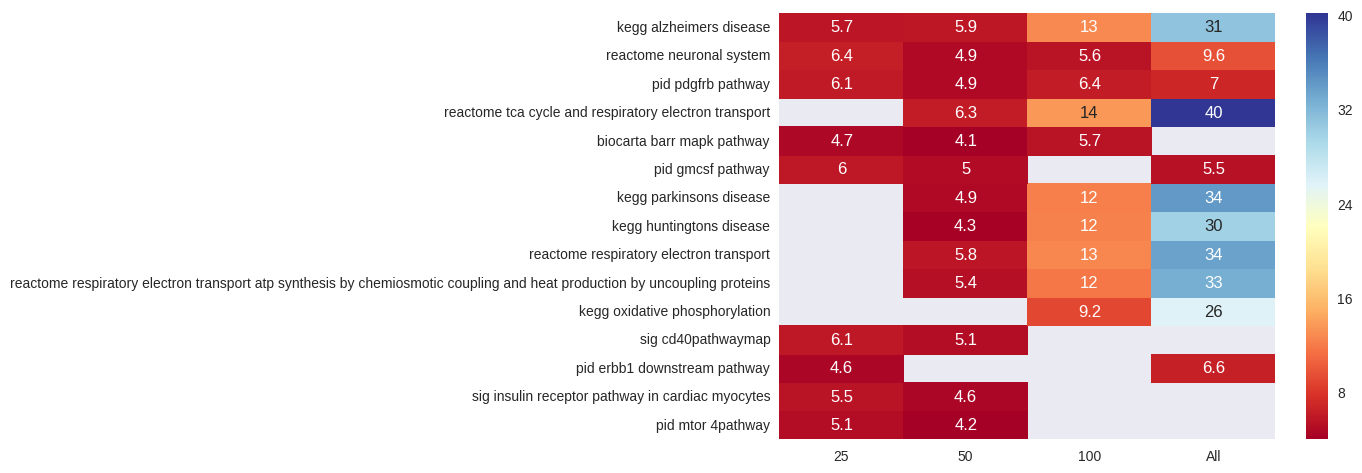

In [4]:
# Generate the heatmap of Protemics Genes Canonical Pathway analysis
sns.heatmap(protCPDF.ix[:, 1:], cmap="RdYlBu", annot=True, yticklabels=list(protCPDF['GeneSet']))

From the result of the GSEA Canonical Pathway of Proteomics protein we can learn that <span style='color:red'>Parkinson's Disease</span> has the second highest *log<sub>10</sub> p-value*. The gene set with the most appearance is *KEGG Alzheimer's disease*, while the gene set with the highest p-value for all of the genes is *reactome TCA cycle and respiratory electron transport*. As we can see from the heatmaps above the other neurodegenerative diseases like <span style='color:blue'>Huntington's Disease</span> and <span style='color:green'>Alzheimer's Disease</span> (gene set with the most appearance) also appeared to be having high log<sub>10</sub> p-value, this tells us that the neurodegenerative diseases have similar genes affected.

The fact that the heatmaps tell us that neurodegenerative diseases affect almost the same genes, lead me to conduct a further study in comparing the RNA-Seq data of the neurodegenerative diseases (*Parkinson's, Huntington's and Alzheimer's Disease*) obtained from the Gene Expression Omnibus database.

In [5]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
rnaCPs = rnaColNames
rnaCPDF = rnaCPDict[rnaCPs[0]]
for rnaCP in rnaCPs[1:]:
    rnaCPDF = pd.merge(rnaCPDF, rnaCPDict[rnaCP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
rnaCPDF['# NaN'] = rnaCPDF.isnull().sum(axis=1)
rnaCPDF = rnaCPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaCPDF['GeneSet']]
rnaCPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in rnaColNames:
    rnaCPDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaCPDF[colName]]

rnaCPDF = rnaCPDF[['GeneSet', '20', '50', '100', '350', '600', '850', 'All']]
rnaCPDF

,GeneSet,20,50,100,350,600,850,All
0,kegg mapk signaling pathway,4.89279,3.823909,6.333482,4.739929,9.145694,9.145694,11.663540
1,reactome transmembrane transport of small mole...,NaN,4.237321,5.818156,5.681937,5.518557,5.518557,6.701147
2,reactome transport of inorganic cations anions...,NaN,3.928118,5.343902,4.379864,6.712198,6.712198,6.818156
3,naba ecm regulators,NaN,4.015473,4.305395,3.892790,4.482804,4.482804,NaN
4,reactome slc mediated transmembrane transport,NaN,NaN,5.069560,4.991400,5.841638,5.841638,7.614394
5,reactome trif mediated tlr3 signaling,NaN,NaN,4.869666,3.328827,5.537602,5.537602,NaN
6,reactome rig i mda5 mediated induction of ifn ...,NaN,NaN,4.903090,3.346787,4.570248,4.570248,NaN
7,naba matrisome,NaN,NaN,5.931814,NaN,8.950782,8.950782,10.434152
8,reactome hemostasis,NaN,NaN,5.913640,NaN,7.202732,7.202732,9.367543
9,naba matrisome associated,NaN,NaN,5.146910,NaN,8.474955,8.474955,9.111821


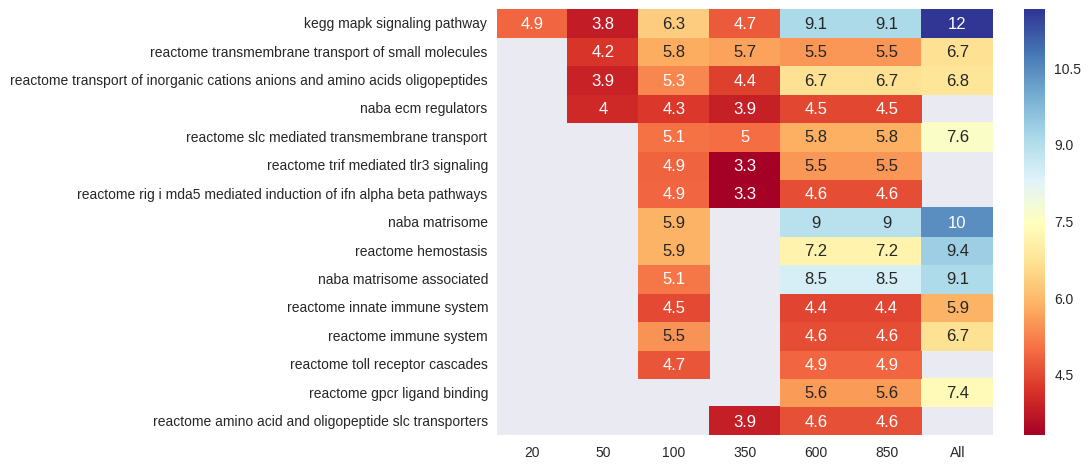

In [6]:
# Generate the heatmap of Protemics Genes Canonical Pathway analysis
sns.heatmap(rnaCPDF.ix[:, 1:], cmap="RdYlBu", annot=True, yticklabels=list(rnaCPDF['GeneSet']))

Different from the results of the GSEA Canonical Pathway performed using the proteomics data set, the analysis which is performed using RNA-Seq data didn't give a specific gene sets related to the Parkinson's Disease.